# Rating Prediction

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

# Data Collection Phase 
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns
1) reviews of the product.

2) rating of the product.

You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.


# Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like:
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

# Hint:
• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.

• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.

• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.


In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK library
import nltk
import string

from nltk.corpus import stopwords #plot
from nltk.tokenize import word_tokenize # tokenization

import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer


#importing sklearn libraries
from sklearn.preprocessing import LabelEncoder,PowerTransformer, StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# imblearn library
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [7]:
pd.set_option("display.max_columns",None)# max rows display
pd.set_option("display.max_rows",None) # max columns display

In [8]:
# Importing dataset excel file using pandas.
df=pd.read_csv(r"Ratings_scraped.csv") 

In [10]:
df.head(10)

,Rattings,Review
0,1,Please don't purchase any Lenovo product.4 mon...
1,1,Please don't purchase any Lenovo product.4 mon...
2,1,Please don't purchase any Lenovo product.4 mon...
3,4,the laptop whole package is awesome. although ...
4,4,"Pros:Good specs, others have written enough ab..."
5,5,(1 month usage update below)I read a lot of re...
6,5,Bought laptop from Amazon for first time. Got ...
7,4,Ok so this is a great gaming laptop no doubt.....
8,1,This is the best gaming performance I've had f...
9,5,"Initially thought that the 16"" laptop was a bi..."


In [12]:
df.tail(2)

,Rattings,Review
42822,1,Half of the functionality of the app are paid ...
42823,5,Very good product if you are looking for WIFI ...


In [14]:
df.columns

Index(['Rattings', 'Review'], dtype='object')

# About Columns

- Rating : Shows rating given by customer
- Review : Comments Shared

In [18]:
print("About Train Data Set :\n\n","DataType ",type(df),"\nShape ",df.shape,"\nSize ",df.size,)

About Train Data Set :

 DataType  <class 'pandas.core.frame.DataFrame'> 
Shape  (42824, 2) 
Size  85648


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42824 entries, 0 to 42823
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  42824 non-null  int64 
 1   Review    42820 non-null  object
dtypes: int64(1), object(1)
memory usage: 669.2+ KB


## Null Values

In [21]:
df.isnull().sum()

Rattings    0
Review      4
dtype: int64

In [24]:
#dropping null values
df.dropna(inplace=True)

# after dropping
df.isnull().sum()

Rattings    0
Review      0
dtype: int64

Text(0.5, 1.0, 'Heatmap representation for NUll Values')

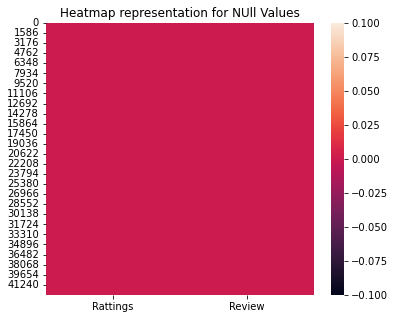

In [35]:
plt.figure(figsize=(6,5))
sns.heatmap(df.isnull())
plt.title("Heatmap representation for NUll Values")

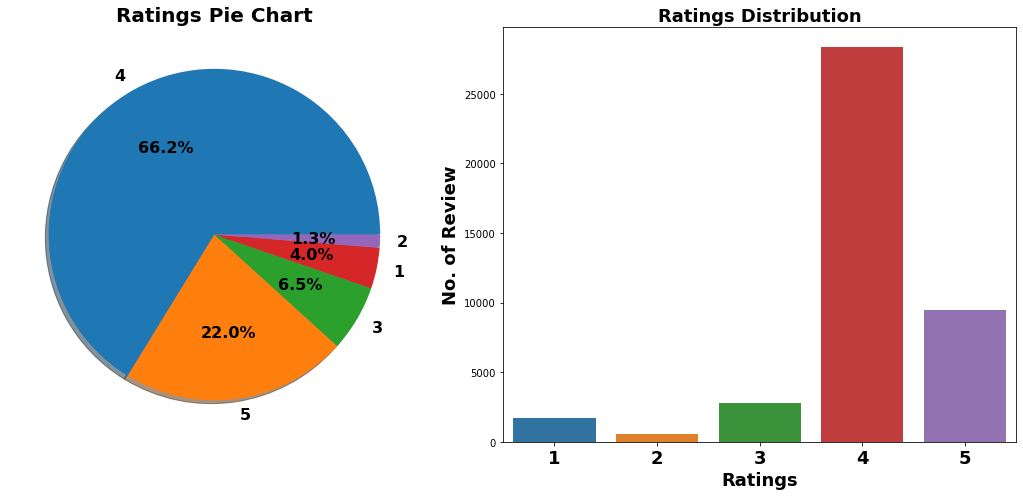

Value Counts of Rating:


4    28362
5     9437
3     2771
1     1708
2      542
Name: Rattings, dtype: int64

In [48]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Rattings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Rattings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Rattings'].value_counts()

# Checking Average Ratings

In [49]:
# Average Rating
print("Average rating given by users is " + str(df['Rattings'].mean()))

Average rating given by users is 4.010695936478281


## Observation shows :

- Around 68% customer given 4- star rating followed by 20% customer given lowest 5-star rating.

- Average Rating is 4.0

# Text Mining
- Operation perform are as followed:

* Removing Punctuations and other special characters
* Word Tokenzation
* Removing Stop Words
* Stemming and Lemmatising
* Applying Count Vectoriser

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [51]:
def clean_text(data, data_column_name):
    
    #Converting all messages to lowercase
    df[data_column_name] = df[data_column_name].str.lower()

    #Replace email addresses with 'email'
    df[data_column_name] = df[data_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[data_column_name] = df[data_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[data_column_name] = df[data_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[data_column_name] = df[data_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[data_column_name] = df[data_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[data_column_name] = df[data_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[data_column_name] = df[data_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[data_column_name] = df[data_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[data_column_name] = df[data_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [54]:
#Calling the class
clean_text(df, 'Review')

In [55]:
df['Review'].sample(5)

3098                                                  like
20692                                                   ok
5880                                           nice mobile
4194                                         cable working
30584    software issue print numbr numbr days one ink ...
Name: Review, dtype: object

In [56]:
#Tokenizing the data using RegexpTokenizer

from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Review'] = df['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head(5)

,Rattings,Review
0,1,"[please, purchase, lenovo, product, numbr, mon..."
1,1,"[please, purchase, lenovo, product, numbr, mon..."
2,1,"[please, purchase, lenovo, product, numbr, mon..."
3,4,"[laptop, whole, package, awesome, although, bi..."
4,4,"[pros, good, specs, others, written, enough, r..."


# Steaming and lemmatization

In [58]:
#importing lib
from nltk.stem import SnowballStemmer
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

In [59]:
#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))     
    return result

In [61]:
#Processing review with above Function
processed_review = []

for doc in df.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

42820


[['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product'],
 ['pleas',
  'purchas',
  'lenovo',
  'product',
  'numbr',
  'month',
  'ago',
  'purchas',
  'lenovo',
  'ideapad',
  'flex',
  'display',
  'issu',
  'complaint',
  'issu',
  'custom',
  'support',
  'center',
  'solv',
  'issu',
  'warranti',
  'period',
  'disappoint',
  'purchas',
  'lenovo',
  'product']]

In [62]:
df['cleaned_review']=processed_review  #Assigning this to the dataframe
df.head()

,Rattings,Review,cleaned_review
0,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
1,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
2,1,"[please, purchase, lenovo, product, numbr, mon...","[pleas, purchas, lenovo, product, numbr, month..."
3,4,"[laptop, whole, package, awesome, although, bi...","[laptop, whole, packag, awesom, although, bite..."
4,4,"[pros, good, specs, others, written, enough, r...","[pros, good, spec, other, write, enough, repea..."


In [64]:
df['Review'] = df['cleaned_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Rattings,Review,cleaned_review
0,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
1,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
2,1,pleas purchas lenovo product numbr month ago p...,"[pleas, purchas, lenovo, product, numbr, month..."
3,4,laptop whole packag awesom although bite price...,"[laptop, whole, packag, awesom, although, bite..."
4,4,pros good spec other write enough repeat work ...,"[pros, good, spec, other, write, enough, repea..."


# Plotting wordcloud for different ratings

### Word Cloud

- Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. 
- The more commonly the term appears within the text being analysed, the larger the word appears in the image generated. The enlarged texts are the most number of words used there and small texts are the less number of words used.

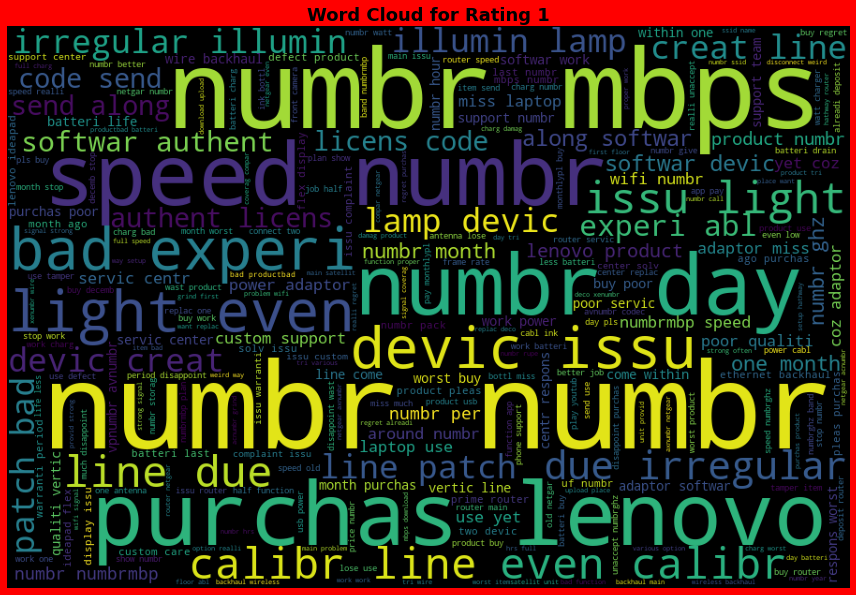

In [67]:
#Getting sense of words in Rating 1
one = df['Review'][df['Rattings']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='black',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

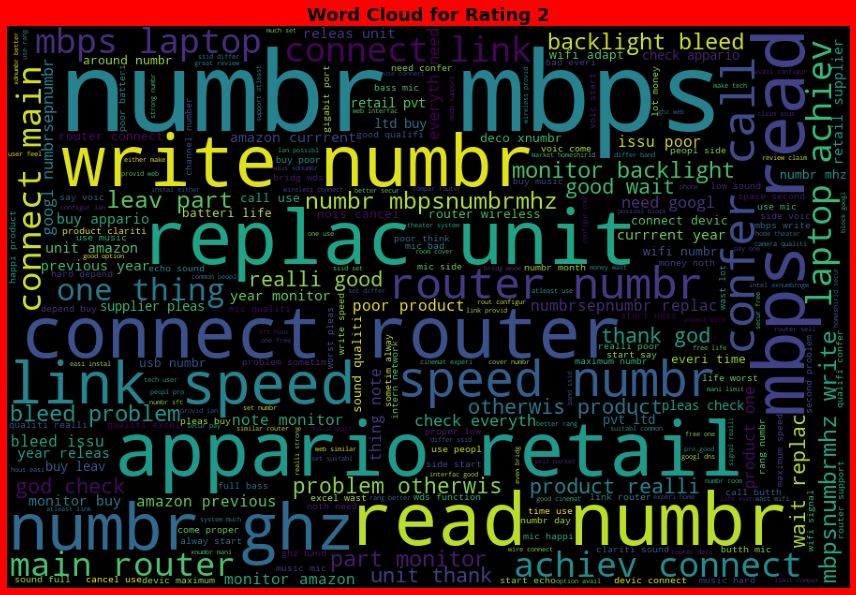

In [68]:
#Getting sense of words in Rating 2
one = df['Review'][df['Rattings']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='black',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

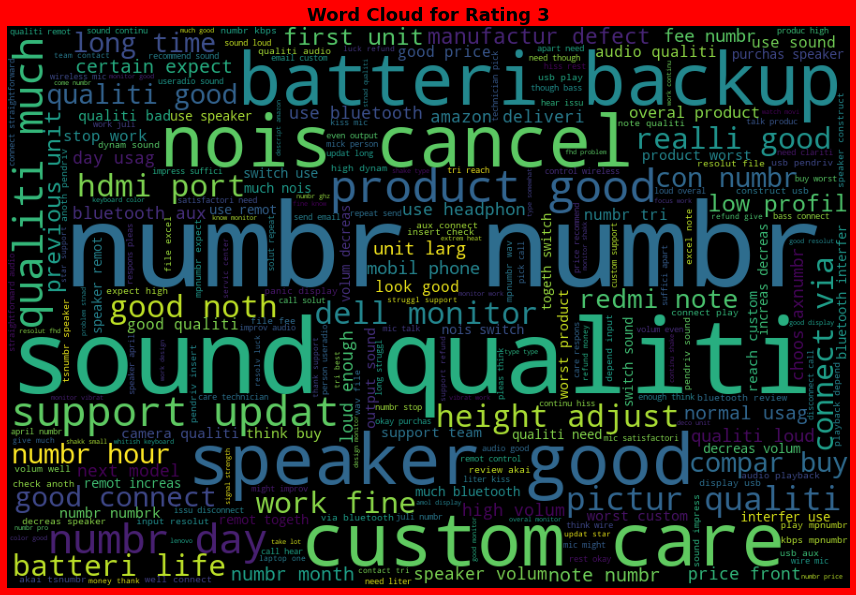

In [69]:
#Getting sense of words in Rating 3
one = df['Review'][df['Rattings']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='black',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

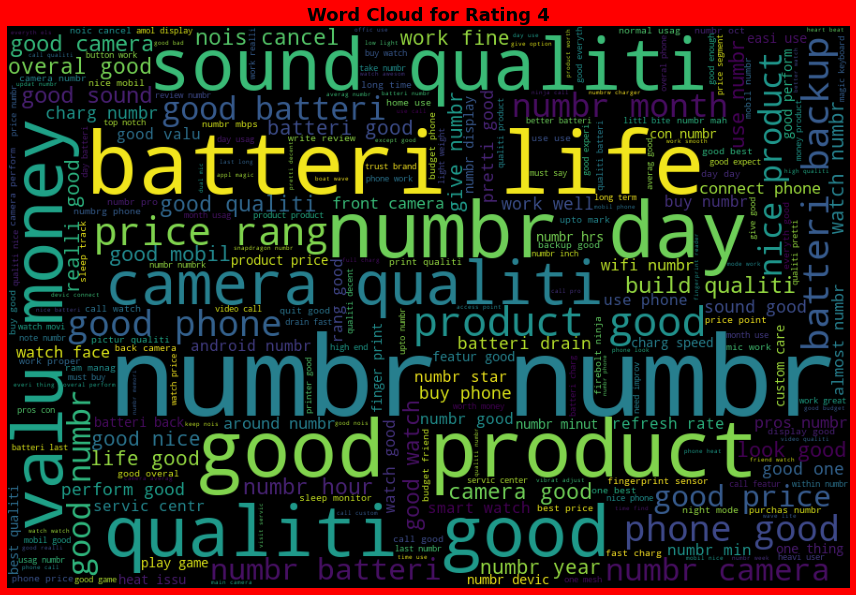

In [70]:
#Getting sense of words in Rating 4
one = df['Review'][df['Rattings']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='black',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

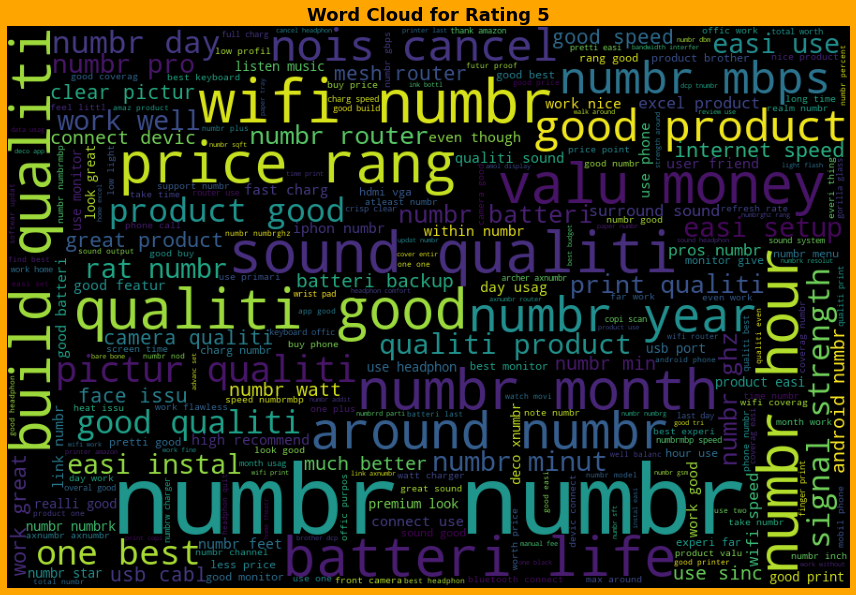

In [72]:
# Getting sense of words in Rating 5
one = df['Review'][df['Rattings']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='black',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='orange')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

## Changing to Text to numeric

In [78]:
# Converting text into numeric using TfidataVectorizer
tf = TfidfVectorizer()
features = tf.fit_transform(df['Review'])
x=features
y=df[['Rattings']]
print(x.shape)

print(y.shape)

(42820, 7528)
(42820, 1)


# Machine Learning Model Building

In [79]:
# linear_model,train test and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Clssifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# cross Validation
from sklearn.model_selection import cross_val_score

# Ensamble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# neural network
from sklearn.neural_network import MLPClassifier

# hyper paramter
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [80]:
lg = LogisticRegression()
dtc= DecisionTreeClassifier()
knn= KNeighborsClassifier()
svc= SVC()
xg = XGBClassifier()
sgd= SGDClassifier()
etc= ExtraTreesClassifier()
rfc= RandomForestClassifier()
ada= AdaBoostClassifier()
gbc= GradientBoostingClassifier()
mlp= MLPClassifier()

In [81]:
models=[lg,dtc,etc,rfc,ada,gbc,xg,knn]

# Train Test 

In [82]:
# Find Train Test

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    #train and score
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    
    #predict train and test
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    
    # loop
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("The random state:-",i)
        print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100,"\n")

The random state:- 57
Training accuracy_score is  93.06982718355908
Testing accuracy_score is  93.05231200373657 

The random state:- 61
Training accuracy_score is  93.21286781877627
Testing accuracy_score is  93.19243344231667 



In [83]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=0.20)

In [84]:
print("Shape x train ",x_train.shape," x test",x_test.shape)
print("shape y train ",y_train.shape," y_test",y_test.shape)

Shape x train  (34256, 7528)  x test (8564, 7528)
shape y train  (34256, 1)  y_test (8564, 1)


In [92]:
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    #result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"\nTesting Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    # graph
    
    from sklearn.metrics import roc_auc_score
    y_pred_proba=m.predict_proba(x_test)
    y_pred_proba

    print("Model Score\n",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))


****************************** 
 LogisticRegression() 
 ******************************
Training Score 0.9321286781877627
Accuracy Training Score = 0.9321286781877627  Accuracy Test Score = 0.9319243344231667 

Training Confusion_Matrix 
 [[ 1241     1     3   117    13]
 [    8   327     3   103     5]
 [    4     0  1842   367    25]
 [    5     0    15 22472   132]
 [    0     1     5  1518  6049]] 
Testing Confusion_Matrix 
 [[ 304    0    2   25    2]
 [   2   70    1   23    0]
 [   0    0  451   75    7]
 [   5    0    4 5690   39]
 [   0    0    1  397 1466]]
Classification Report 
               precision    recall  f1-score   support

           1       0.98      0.91      0.94       333
           2       1.00      0.73      0.84        96
           3       0.98      0.85      0.91       533
           4       0.92      0.99      0.95      5738
           5       0.97      0.79      0.87      1864

    accuracy                           0.93      8564
   macro avg       0.97

A cross-fold  2 CV_mean  0.6187762727697337 Training Score  0.8871730499766465 Testing Score  0.8880196170014012
A cross-fold  3 CV_mean  0.6899116847500416 Training Score  0.8871730499766465 Testing Score  0.8880196170014012
A cross-fold  4 CV_mean  0.6447454460532461 Training Score  0.8871730499766465 Testing Score  0.8880196170014012
A cross-fold  5 CV_mean  0.7216254086875292 Training Score  0.8871730499766465 Testing Score  0.8880196170014012
Model Score
 0.9486791860536865 



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [93]:
models=[knn]
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    #result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"\nTesting Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    # graph
    
    from sklearn.metrics import roc_auc_score
    y_pred_proba=m.predict_proba(x_test)
    y_pred_proba

    print("Model Score\n",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))


****************************** 
 KNeighborsClassifier() 
 ******************************
Training Score 0.953993460999533
Accuracy Training Score = 0.953993460999533  Accuracy Test Score = 0.9472209248014947 

Training Confusion_Matrix 
 [[ 1298     0     8    55    14]
 [    0   413     2    18    13]
 [    4     0  2006   154    74]
 [    3     2    31 22189   399]
 [    0     1    23   775  6774]] 
Testing Confusion_Matrix 
 [[ 314    0    3   15    1]
 [   0   86    0    9    1]
 [   0    0  483   39   11]
 [   4    0    9 5584  141]
 [   0    0    8  211 1645]]
Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.94      0.96       333
           2       1.00      0.90      0.95        96
           3       0.96      0.91      0.93       533
           4       0.95      0.97      0.96      5738
           5       0.91      0.88      0.90      1864

    accuracy                           0.95      8564
   macro avg       0.96

# Hyper- Parameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
parameter = { 'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [75,100,150]}
gsv = GridSearchCV(rfc,parameter,verbose=10,cv=5)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 1/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.955 total time=  18.7s
[CV 2/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 2/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.959 total time=  18.6s
[CV 3/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 3/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.961 total time=  18.5s
[CV 4/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 4/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.954 total time=  18.8s
[CV 5/5; 1/12] START criterion=gini, max_features=auto, n_estimators=75.........
[CV 5/5; 1/12] END criterion=gini, max_features=auto, n_estimators=75;, score=0.958 total time=  18.6s
[CV 1/5; 2/12] STAR

[CV 5/5; 9/12] END criterion=entropy, max_features=auto, n_estimators=150;, score=0.958 total time=  33.1s
[CV 1/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 1/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.955 total time=  18.9s
[CV 2/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 2/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.958 total time=  19.4s
[CV 3/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 3/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.960 total time=  20.2s
[CV 4/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 4/5; 10/12] END criterion=entropy, max_features=log2, n_estimators=75;, score=0.955 total time=  19.0s
[CV 5/5; 10/12] START criterion=entropy, max_features=log2, n_estimators=75.....
[CV 5/5; 10/12] END criterion=entropy, max_features=log2, n_

In [97]:
#random Forest Training and score
rfc=RandomForestClassifier(n_estimators=200, criterion='gini', max_features='sqrt')
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict random Forest
pred_train1=rfc.predict(x_train)
y_pred=rfc.predict(x_test)
      
#result random Forest
print("Model Score ",rfc_score)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Model Score  0.9735228865016348
Final Random Forest Classifier Model
Accuracy Score :
 0.9653199439514246


Confusion matrix of Random Forest Classifier : 
 [[ 319    0    0   12    2]
 [   0   90    0    6    0]
 [   0    0  495   36    2]
 [   0    0    0 5714   24]
 [   0    0    2  213 1649]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98       333
           2       1.00      0.94      0.97        96
           3       1.00      0.93      0.96       533
           4       0.96      1.00      0.98      5738
           5       0.98      0.88      0.93      1864

    accuracy                           0.97      8564
   macro avg       0.99      0.94      0.96      8564
weighted avg       0.97      0.97      0.96      8564



In [99]:
#Accuracy_Score
test_accuracy=accuracy_score(y_test,y_pred)

#cross val
for i in range(2,6):
    cv_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_Score ",cv_mean,"Testing Score ",test_accuracy)

A cross-fold  2 CV_Score  0.6308267164876227 Testing Score  0.9653199439514246
A cross-fold  3 CV_Score  0.7275116044723454 Testing Score  0.9653199439514246
A cross-fold  4 CV_Score  0.7058617468472677 Testing Score  0.9653199439514246
A cross-fold  5 CV_Score  0.7774871555347967 Testing Score  0.9653199439514246


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

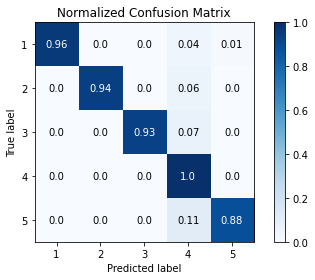

In [104]:
import scikitplot as skplt

# Creating a normalized confusion matrix here
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)

In [105]:
from sklearn.metrics import roc_auc_score
y_pred_proba=rfc.predict_proba(x_test)
y_pred_proba

print("Model Score\n",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model Score
 0.9945873297690634


In [106]:
import pickle
filename='Rating_Predict.pkl'
pickle.dump(rfc,open(filename,'wb'))

In [107]:
# loading pack file
pickled_model= pickle.load(open(filename,'rb'))
result=pickled_model.score(x_test,y_test)
result*100

96.53199439514246

In [111]:
conclude=pd.DataFrame([pickled_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Original'])
conclude

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     4     4     4     4     4     4     5     4     4     4     5   
Original      4     4     4     4     4     4     5     4     4     5     5   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     4     3     4     4     4     4     5     4     4     1     4   
Original      4     3     4     4     4     4     5     4     4     1     4   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     5     4     4     4     1     1     5     3     5     4     4   
Original      5     4     4     4     1     1     5     3     5     4     4   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     4     1     4     4     3     4     1     4     4     5     4   
Original      4     1     4     4     3     4     1     4     4     5     4   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     4     5     4     5     4     4     4     4     4     4     5   
Original      4     5     4     5     4     4     4     4     4     4     5   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     4     4     4     4     4     5     5     4     5     4     4   
Original      4     4     4     4     4     5     5     4     5     5     4   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     3     4     4     4     4     5     3     4     4     4     4   
Original      3     4     4     4     4     5     3     4     4     4     4   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     5     2     4     4     4     5     4     4     4     5     4   
Original      4     2     4     4     4     5     4     4     4     5     4   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     4     4     4     4     4     4     4     4     4     4     4   
Original      4     4     4     4     4     4     4     4     4     4     4   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     5     4     4     4     4     5     4     4     5     5     4   
Original      5     4     4     4     4     5     4     4     5     5     4   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     5     3     4     5     4     4     4     5     3     4     4   
Original      5     3     4     5     4     4     4     5     3     4     4   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     4     4     4     1     4     4     5     4     5     1     4   
Original      4     4     4     1     4     4     5     4     5     1     4   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     4     5     4     1     5     4     4     4     4     5     4   
Original      4     5     4     1     5     4     4     4     4     5     4   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     4     4     4     4     5     1     3     4     4     4     4   
Original      4     4     4     4     5     1     3     4     4     4     4   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     4     4     4     4     5     4     4     4     4     4     4   
Original      4     4     4     4     5     4     4     4     4     4     4   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     1     5     4     5     4     4     4     5     4     4     4   
Original      1     5     4     5     4     4     4     5     4     4     4   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     4     3     4     4     4     4     4     4     5     5     3   
Original      4     3     4     4     4     4